<img src = "images/Worksheet8/Header.png">

<img src = "images/Worksheet8/1.png">

No, they aren't all unit vectors.

<img src = "images/Worksheet8/2.png">

<img src = "images/Worksheet8/a2.jpg" data-rotate="90">

<img src = "images/Worksheet8/3.png">

<b>3)</b> <p></p>
    (a) What are the dimensions of each of the following?
<ul>   
    <li>p x 2</li>
    <li>2 x p</li>
    <li>p x p</li>
    <li>p x p</li>
</ul>

<p>

(b) What are the differences, if any, between the following four projections? 
<p>
<ul>   
    <li>p x 2 (primary projection)</li>
    <li>p x 2 (secondary projection)</li>
    <li>2 x p</li>
    <li>p x p</li>
</ul> 


<img src = "images/Worksheet8/4.png">

In [103]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from pylab import rcParams
from sklearn.decomposition import PCA

In [104]:
samples_features = pd.read_fwf("data/predicate-matrix-continuous.txt", header=None).values
classes=pd.read_fwf("data/classes.txt", header=None)[1].values

In [105]:
clf=KMeans(init='k-means++', n_clusters=10, n_init=10)
clf.fit(samples_features, classes) #samples_features is a samples by features matrix
clusters = clf.predict(samples_features) # clusters are int32 from 0-9 for n_clusters = 10

grouping = {i:[] for i in xrange(0,10)}

for i,animal in enumerate(classes):
    grouping[clusters[i]].append(animal)

In [106]:
pca = PCA(n_components=2)
features_train_reduced = pca.fit_transform(samples_features)

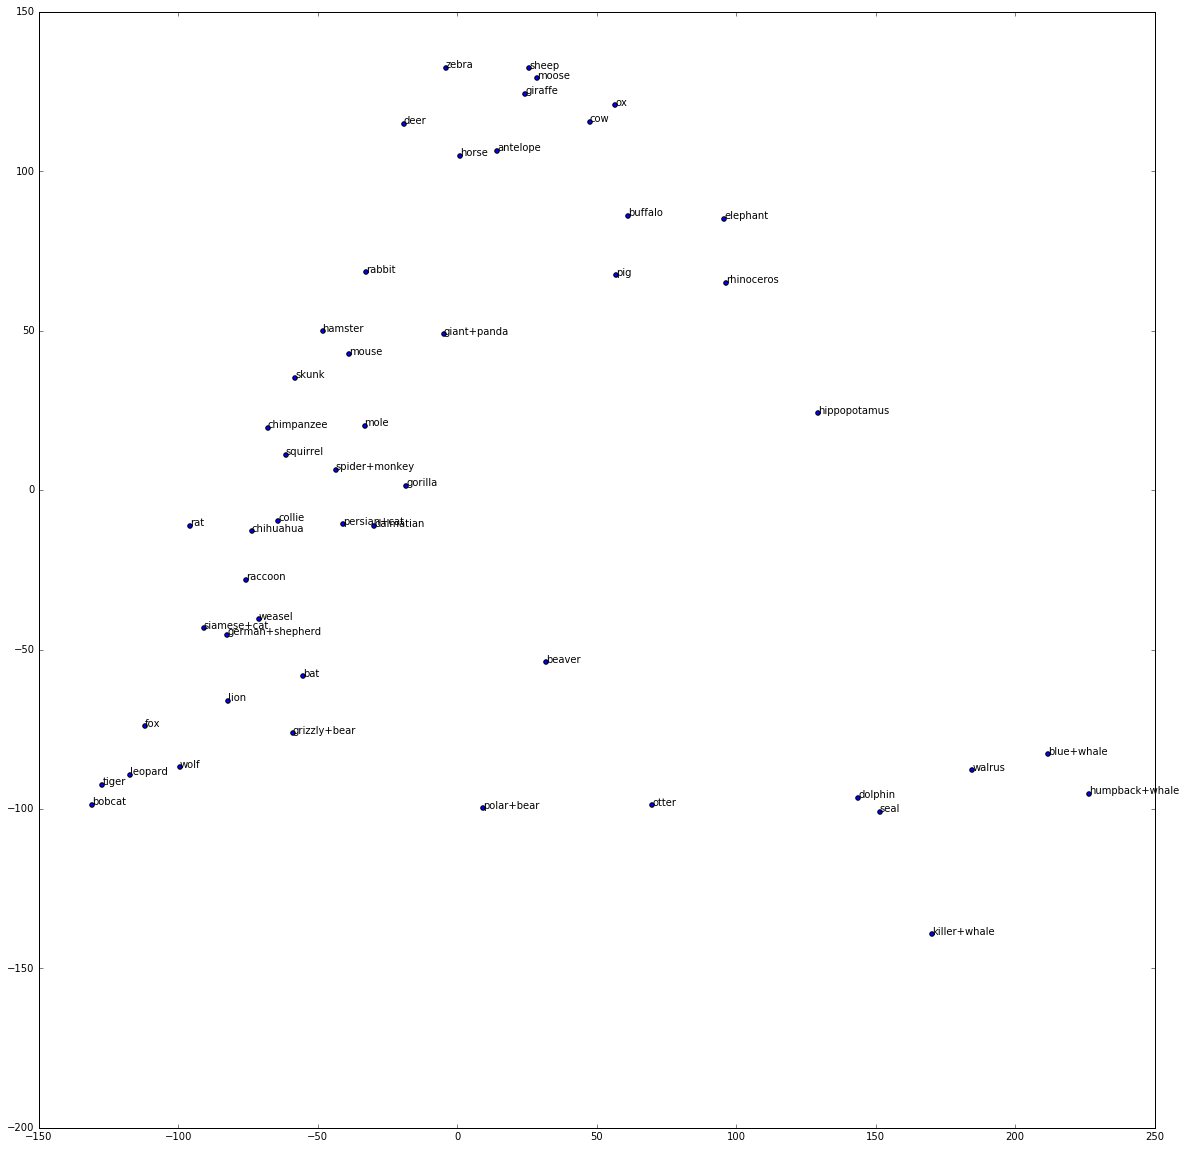

In [107]:
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot(111)
for i,point in enumerate(features_train_reduced):
    ax.annotate(classes[i], xy=point, xytext=point)
    
plt.scatter(features_train_reduced[:,0], features_train_reduced[:,1])

### Does this embedding seem sensible to you?

The embedding seems sensible. It seems to make very intuitive sense. 

<img src = "images/Worksheet8/5.png">

In [108]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
import sys
import os
import pandas as pd

def loadmnist(imagefile, labelfile):
    if os.path.isfile(imagefile+'.npy'):
        x = np.load(imagefile + '.npy')
        y = np.load(labelfile + '.npy')
        return (x,y)

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    
    np.save(imagefile + '.npy', x)
    np.save(labelfile + '.npy', y)
    
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')

In [109]:
X_train, Y_train = loadmnist('train-images-idx3-ubyte', 
'train-labels-idx1-ubyte')
X_test, Y_test = loadmnist('t10k-images-idx3-ubyte', 
't10k-labels-idx1-ubyte')

In [110]:
cov=np.cov(X_train.T)
evals, evecs = np.linalg.eig(cov)
evals = np.float64(evals)
evecs = np.float64(evecs)
total_variation = np.sum(evals)

In [111]:
def F(k):
    numerator = np.sum(evals[k+1::])
    return numerator/total_variation

In [112]:
k_var = [(i, F(i)) for i in [200, 150, 100, 50, 25]]

classes_features = pd.DataFrame(data = k_var, columns = ['k value', 'Remaining Variance'])
classes_features

,k value,Remaining Variance
0,200,0.033271
1,150,0.051177
2,100,0.084387
3,50,0.172163
4,25,0.299802


<b>b</b>

In [113]:
def transform(k, image, image_id):
    # dot product is commutative
    U = evecs[:,:k+1]
    UUT = np.dot(U,U.T)
    image = image.T
    X = np.dot(UUT,image).T[image_id]
    X = X.reshape(28,28)
    return X

In [114]:
def printdigit(X,k):
    plt.imshow(X, cmap=plt.cm.gray) 
    plt.title('%i' % k, fontsize = 10)
    plt.axis('off')

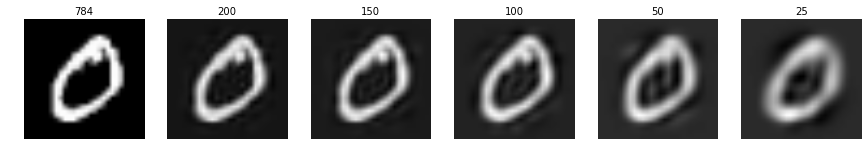

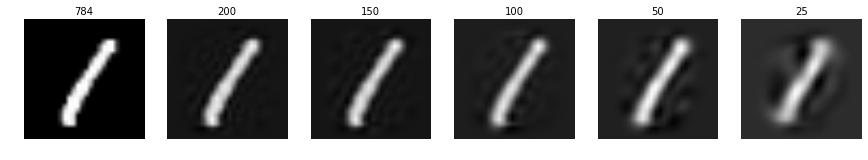

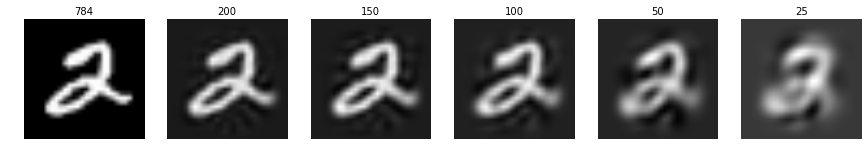

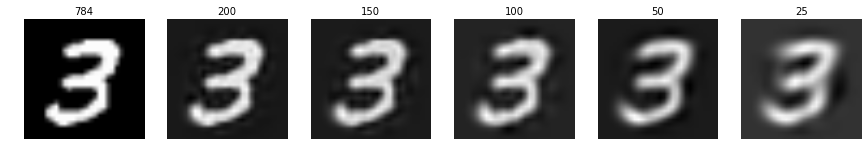

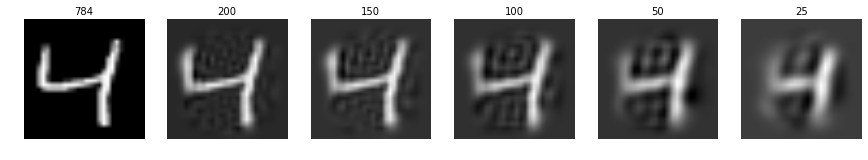

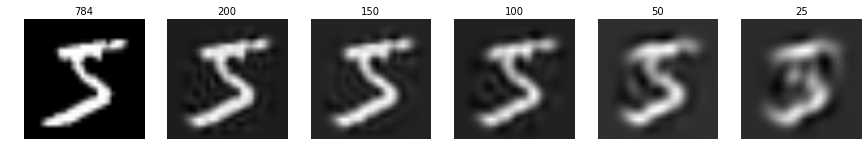

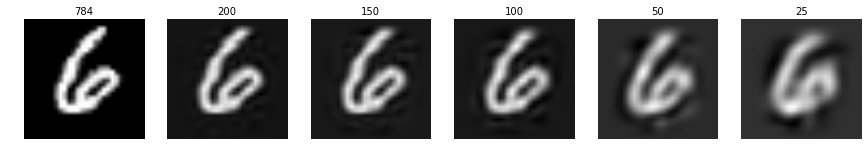

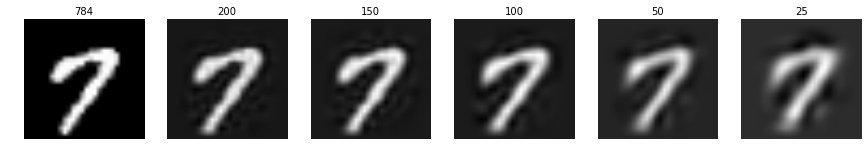

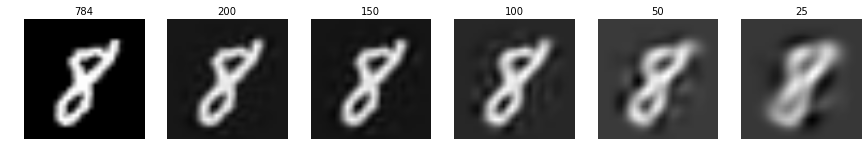

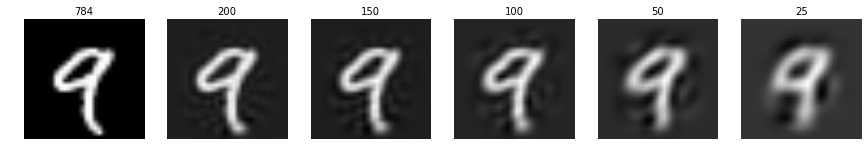

In [115]:
table={}
for number in xrange(0,10):
    x_train=[]
    y_train=[]
    table[number]={}
    
    for i, image in enumerate(X_train):
        if Y_train[i] == number:
            x_train.append(image)
            y_train.append(number)

    x_train = np.array(x_train)
    index = 0
    plt.figure(figsize=(15,5))
    for k in [784, 200, 150, 100, 50, 25]:
        table[number][k]=F(k)
        image_reduced = transform(k, x_train[:10], 0)
        index += 1
        plt.subplot(1, len(k_list), index)
        printdigit(image_reduced, k)

In [116]:
import pandas as pd

In [117]:
full_table = pd.DataFrame(table)
full_table

,0,1,2,3,4,5,6,7,8,9
25,0.299802,0.299802,0.299802,0.299802,0.299802,0.299802,0.299802,0.299802,0.299802,0.299802
50,0.172163,0.172163,0.172163,0.172163,0.172163,0.172163,0.172163,0.172163,0.172163,0.172163
100,0.084387,0.084387,0.084387,0.084387,0.084387,0.084387,0.084387,0.084387,0.084387,0.084387
150,0.051177,0.051177,0.051177,0.051177,0.051177,0.051177,0.051177,0.051177,0.051177,0.051177
200,0.033271,0.033271,0.033271,0.033271,0.033271,0.033271,0.033271,0.033271,0.033271,0.033271
784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
table = full_table.values.tolist()
# convert df back to numpy
kfractions = np.array(table)

In [119]:

# Find the k dimension that has fraction with greatest value
k_row = np.argmax(kfractions, axis = 0)

# With that k value, find the fraction that has the lowest value (less loss)
amenable_digit = np.argmin(kfractions[k_row[1]], axis = 0)

print "The digitwith the low-dimensional projection is: ", amenable_digit

The digitwith the low-dimensional projection is:  0
